В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов A Wiki of Ice and Fire. Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.

Описание данных:

name: Имя персонажа

Title: Социальный статус или знатность

House: Дом, к которому принадлежит персонаж

Culture: Социальная группа, к которой принадлежит персонаж

book1/2/3/4/5: Появление персонажа в книге

Is noble: Знатность персонажа, основанное на титуле

Age: Отсчет времени: 305 AC

male: Мужчина или женщина

dateOfBirth: дата рождения

Spouse: Имя супруги\а персонажа

Father: Имя отца персонажа

Mother: Имя матери персонажа

Heir: Имя наследника персонажа

Is married: Represents whether the character is married

Is spouse alive: Represents whether character's spouse is alive

Is mother alive: Жива ли мать персонажа

Is heir alive: Жив ли наследник персонажа

Is father alive: Указывает, жив ли отец персонажа

Number dead relations: Количество умерших персонажей, с которыми персонаж связан

Popularity score: Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:

isAlive: жив ли персонаж в книге


In [5]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 70.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 15.7MB/s]


In [6]:
import pandas as pd
import numpy as np

In [7]:
# Загружаем датасет из CSV-файла
# Указываем параметр index_col, чтобы использовать столбец 'S.No' в качестве индекса строк
df = pd.read_csv('game_of_thrones_train.csv', index_col='S.No')

df.describe()

,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
count,1557.000000,279.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,18.000000,22.000000,21.000000,200.00000,1557.000000,1557.000000,279.000000,1557.000000,1557.000000,1557.000000
mean,0.590880,247.551971,0.138728,0.327553,0.431599,0.562620,0.330122,0.666667,0.227273,0.666667,0.79000,0.128452,0.439306,35.290323,0.187540,0.062400,0.778420
std,0.491829,61.550441,0.345774,0.469472,0.495458,0.496223,0.470408,0.485071,0.428932,0.483046,0.40833,0.334700,0.496462,26.364864,1.114648,0.121416,0.415443
min,0.000000,-25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,241.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,16.000000,0.000000,0.013378,1.000000
50%,1.000000,272.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.00000,0.000000,0.000000,24.000000,0.000000,0.023411,1.000000
75%,1.000000,286.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.00000,0.000000,1.000000,49.000000,0.000000,0.063545,1.000000
max,1.000000,299.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Обработка категориальных данных
categorical_cols = ['name', 'title', 'culture', 'mother', 'father', 'heir', 'house', 'spouse']
for col in categorical_cols:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='mean')
df[['dateOfBirth', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'age']] = imputer.fit_transform(
    df[['dateOfBirth', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'age']]
)

# Масштабирование числовых признаков
numeric_cols = ['dateOfBirth', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'age', 'popularity']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Разделение данных на обучающую и тестовую выборки
X = df.drop('isAlive', axis=1)
y = df['isAlive']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Словарь для хранения моделей
models = {
    'Logistic Regression': LogisticRegression(n_jobs=-1),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gaussian Process': GaussianProcessClassifier(),
    'GaussianNB': GaussianNB(),
    'KNeighbors': KNeighborsClassifier(),
    'Support Vector Classifier': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
}

# Обучение моделей и предсказание на тестовой выборке
for model_name, model in models.items():
    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание на тестовых данных
    y_pred = model.predict(X_test)

    # Оценка точности
    accuracy = accuracy_score(y_test, y_pred)

    print(f'{model_name} Accuracy: {accuracy:.2f}')

Logistic Regression Accuracy: 0.80
Random Forest Accuracy: 0.81
AdaBoost Accuracy: 0.81
Gaussian Process Accuracy: 0.58
GaussianNB Accuracy: 0.80
KNeighbors Accuracy: 0.72
Support Vector Classifier Accuracy: 0.75
Decision Tree Accuracy: 0.76


In [ ]:
# Загрузка тестовых данных
test = pd.read_csv("/content/game_of_thrones_test.csv", index_col='S.No')

# Преобразование категориальных признаков
test['isPopular'] = test['popularity'].apply(lambda x: 1 if x > 0.5 else 0)
test['boolDeadRelations'] = test['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)
test["culture"] = test["culture"].astype(str).apply(lambda x: x.lower() if not x.startswith('nan') else x)

# Удаление ненужных столбцов
test.drop(columns=['name', 'numDeadRelations', 'popularity'], inplace=True)

# Список категориальных признаков
categorical_columns = ['title', 'male', 'culture', 'house', 'book1', 'book2', 'book3',
                       'book4', 'book5', 'isMarried', 'isNoble', 'isPopular', 'boolDeadRelations',
                       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'mother', 'father', 'heir', 'spouse']

# Инициализация LabelEncoder
label_encoder = LabelEncoder()

# Убедимся, что признаки в тестовом наборе совпадают с признаками в обучающем наборе"""!!!!!!!
# Получаем список признаков, которые использовались при обучении
trained_features = X_train.columns.tolist()

# Удаляем из тестового набора признаки, которые не были в обучающем наборе
test = test[test.columns.intersection(trained_features)]

# Добавляем отсутствующие признаки в тестовый набор с их средними значениями из обучающего набора
missing_features = set(trained_features) - set(test.columns)
for feature in missing_features:
    test[feature] = X_train[feature].mean()  # Используем среднее значение из обучающего набора

# Убедимся, что порядок признаков в тестовом наборе совпадает с порядком в обучающем наборе"""!!!!!!!
test = test[trained_features]

# Масштабирование числовых признаков
test[trained_features] = scaler.transform(test[trained_features])
# Преобразуем категориальные признаки в числа
for feature in categorical_columns:
    if feature in test.columns:  # Проверка наличия столбца
        test[feature] = label_encoder.fit_transform(test[feature].astype(str))

# Масштабирование числовых признаков
scaler = StandardScaler()
test[categorical_columns] = scaler.fit_transform(test[categorical_columns])

# Заполнение пропусков средними значениями в остальных признаках
numerical_cols = test.select_dtypes(include=np.number).columns
for col in numerical_cols:
    test[col] = test[col].fillna(test[col].mean())

# Выводим результат
print("DataFrame после преобразования категориальных признаков:")
print(test.head())

# Предсказание с использованием лучшей модели (например, Random Forest)
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(test)

# Создание DataFrame для сохранения результатов
y_pred_df = pd.DataFrame(y_pred, columns=['isAlive'])

# Сохранение результатов в файл
y_pred_df.to_csv("/content/new_submission.csv", index=False)

# Вывод первых строк результата
print(y_pred_df.head())

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- book1
- book2
- book3
- book4
- book5
- ...


In [ ]:
import pandas as pd
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.3 MB/s eta 0:00:00


              male  dateOfBirth        book1        book2        book3  \
count  1557.000000   279.000000  1557.000000  1557.000000  1557.000000   
mean      0.590880   247.551971     0.138728     0.327553     0.431599   
std       0.491829    61.550441     0.345774     0.469472     0.495458   
min       0.000000   -25.000000     0.000000     0.000000     0.000000   
25%       0.000000   241.000000     0.000000     0.000000     0.000000   
50%       1.000000   272.000000     0.000000     0.000000     0.000000   
75%       1.000000   286.000000     0.000000     1.000000     1.000000   
max       1.000000   299.000000     1.000000     1.000000     1.000000   

             book4        book5  isAliveMother  isAliveFather  isAliveHeir  \
count  1557.000000  1557.000000      18.000000      22.000000    21.000000   
mean      0.562620     0.330122       0.666667       0.227273     0.666667   
std       0.496223     0.470408       0.485071       0.428932     0.483046   
min       0.000000   

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Accuracy: 0.8577
              Feature  Importance
12              book4   13.171721
3         dateOfBirth   11.243043
7               house   10.767570
1                male    9.923806
2             culture    8.316500
11              book3    7.888413
10              book2    7.298259
0               title    7.238156
13              book5    6.399586
19            isNoble    5.531442
20                age    3.345887
9               book1    2.742540
8              spouse    1.296864
22  boolDeadRelations    1.249738
18          isMarried    1.144065
17      isAliveSpouse    0.962048
5              father    0.554741
21          isPopular    0.324449
6                heir    0.212269
15      isAliveFather    0.170841
16        isAliveHeir    0.147393
4              mother    0.052765
14      isAliveMother    0.017904


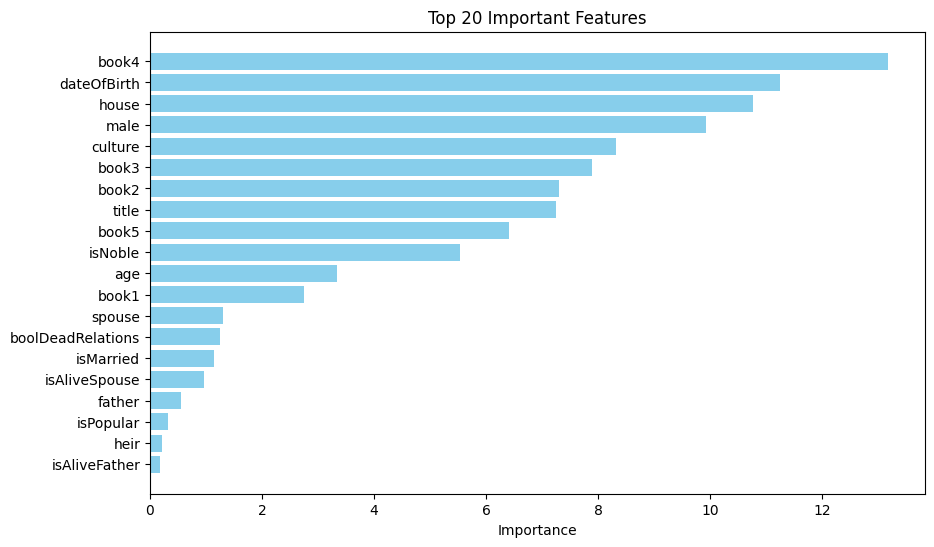

DataFrame после преобразования категориальных признаков:
         title      male   culture  dateOfBirth    mother    father  \
S.No                                                                  
1     0.630132  0.832101  0.094070   247.551971 -4.827108 -7.906025   
2    -0.943797  0.832101  1.448846   208.000000  0.095480  0.104771   
3     0.012514  0.832101  0.094070   247.551971  0.095480  0.104771   
4    -0.346102 -1.201778  0.094070    82.000000  0.095480  0.104771   
5    -2.179032 -1.201778 -2.163890   276.000000  0.095480  0.104771   

           heir     house    spouse     book1  ...  isAliveMother  \
S.No                                           ...                  
1    -14.580816  1.085096  0.323076 -0.401340  ...      -6.508630   
2      0.102320 -0.982695 -1.099455  2.491653  ...       0.101896   
3      0.102320  0.389205  0.323076 -0.401340  ...       0.101896   
4      0.102320 -1.827706  0.049512 -0.401340  ...       0.101896   
5      0.102320  0.140672 -3.23

In [ ]:
import numpy as np
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE  # Импорт SMOTE для балансировки классов
import matplotlib.pyplot as plt


# Загружаем датасет из CSV-файла
# Указываем параметр index_col, чтобы использовать столбец 'S.No' в качестве индекса строк
df = pd.read_csv('game_of_thrones_train.csv', index_col='S.No')

# Проверка данных
print(df.describe())

# Создаем признак isPopular
df['isPopular'] = df['popularity'].apply(lambda x: 1 if x > 0.5 else 0)

# Создаем признак boolDeadRelations
df['boolDeadRelations'] = df['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)

# Приведение столбца 'culture' к нижнему регистру
df["culture"] = df["culture"].astype(str).apply(lambda x: x.lower() if not x.startswith('nan') else x)

# Удаление ненужных столбцов
df.drop(columns=['name', 'numDeadRelations', 'popularity'], inplace=True)

# Список категориальных признаков
categorical_columns = ['title', 'male', 'culture', 'house', 'book1', 'book2', 'book3',
                       'book4', 'book5', 'isMarried', 'isNoble', 'isPopular', 'boolDeadRelations',
                       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'mother', 'father', 'heir', 'spouse']

# Инициализация LabelEncoder
label_encoder = LabelEncoder()

# Преобразуем категориальные признаки в числа
for feature in categorical_columns:
    if feature in df.columns:  # Проверка наличия столбца
        df[feature] = label_encoder.fit_transform(df[feature].astype(str))

# Масштабирование числовых признаков
scaler = StandardScaler()
df[categorical_columns] = scaler.fit_transform(df[categorical_columns])

# Заполнение пропусков средними значениями в остальных признаках
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())

# Разделение на признаки и целевую переменную
X = df.drop(columns=['isAlive'])
y = df["isAlive"]

# Балансировка классов с использованием SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=42, test_size=0.2)

# Создание и обучение модели CatBoost
cat = CatBoostClassifier(silent=True)
cat.fit(X_train, y_train)

# Предсказание и оценка точности
y_pred = cat.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.4f" % accuracy)

# Вычисление важности признаков
feature_importances = cat.get_feature_importance()

# Получение имен признаков
feature_names = X.columns

# Создание DataFrame для удобства
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Сортировка по важности
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Вывод важности признаков
print(importance_df)

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:20], importance_df['Importance'][:20], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 20 Important Features')
plt.gca().invert_yaxis()  # Инвертировать ось Y для лучшего отображения
plt.show()

# Выводим результат
print("DataFrame после преобразования категориальных признаков:")
print(df.head())

# Вывод информации о DataFrame
print(df.info())

In [ ]:
import numpy as np
import pickle
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Загрузка тестовых данных
test = pd.read_csv("/content/game_of_thrones_test.csv", index_col='S.No')

# Преобразование категориальных признаков
test['isPopular'] = test['popularity'].apply(lambda x: 1 if x > 0.5 else 0)
test['boolDeadRelations'] = test['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)
test["culture"] = test["culture"].astype(str).apply(lambda x: x.lower() if not x.startswith('nan') else x)

# Удаление ненужных столбцов
test.drop(columns=['name', 'numDeadRelations', 'popularity'], inplace=True)

# Список категориальных признаков
categorical_columns = ['title', 'male', 'culture', 'house', 'book1', 'book2', 'book3',
                       'book4', 'book5', 'isMarried', 'isNoble', 'isPopular', 'boolDeadRelations',
                       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'mother', 'father', 'heir', 'spouse']

# Инициализация LabelEncoder
label_encoder = LabelEncoder()

# Преобразуем категориальные признаки в числа
for feature in categorical_columns:
    if feature in test.columns:  # Проверка наличия столбца
        test[feature] = label_encoder.fit_transform(test[feature].astype(str))

# Масштабирование числовых признаков
scaler = StandardScaler()
test[categorical_columns] = scaler.fit_transform(test[categorical_columns])

# Заполнение пропусков средними значениями в остальных признаках
numerical_cols = test.select_dtypes(include=np.number).columns
for col in numerical_cols:
    test[col] = test[col].fillna(test[col].mean())

# Предсказание с использованием обученной модели
y_pred = cat.predict(test)

# Создание DataFrame для сохранения результатов
y_pred_df = pd.DataFrame(y_pred, columns=['isAlive'])

# Сохранение результатов в файл
y_pred_df.to_csv("/content/new_submission_cat.csv", index=False)

# Вывод первых строк результата
print(y_pred_df.head())

   isAlive
0        0
1        0
2        0
3        0
4        0


In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF #Пример файла в степик

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 9.04MB/s]
